# Flight Path Analysis
This notebook evaluates the origins and destinations of flights in the two periods of: 
* Jan - July 2019
* Jan - July 2020

We retrieved monthly data for international and domestic markets from the US Department of Transportation, Bureau of Transporation Statistics. The data has monthly summaries of passengers with origins and destinations of the flights taken each month and is only current through July 2020. For this reason, we limited our analysis to compare only January to July in 2019 and 2020.

Data Source: [Air Carriers: T-100 Market (All Carriers) from the Bureau of Transportation Statistics, US Department of Transporation](https://www.transtats.bts.gov/Tables.asp?DB_ID=111&DB_Name=Air%20Carrier%20Statistics%20%28Form%2041%20Traffic%29-%20All%20Carriers&DB_Short_Name=Air%20Carriers) 


In this notebook, we will use the Chi Squared Test and bar charts to evaluate the following hypotheses:

**Null Hypothesis** - There is no statistical significance in the difference of flight paths when comparing 2019 flights to 2020 flights. 

**Alternative Hypothesis** - There is a statistical significance in the difference of flight paths when comparing 2019 flights to 2020 flights. 

## Summary Analysis


In [1]:
#import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

#get data
flightdata = pd.read_csv('output_data/flightdata.csv')
flightdata.head(10)

,UNIQUE_CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST,DEST_CITY_NAME,...,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,PASSENGERS,DISTANCE,CLASS,flight
0,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,33,DAL,"Dallas, TX",...,United States,74,2019,2,6,3,0.0,1091.0,F,PBIDAL
1,Southwest Airlines Co.,PHL,"Philadelphia, PA",PA,Pennsylvania,US,United States,23,GEG,"Spokane, WA",...,United States,93,2019,2,6,5,0.0,2155.0,F,PHLGEG
2,Southwest Airlines Co.,PVD,"Providence, RI",RI,Rhode Island,US,United States,15,ATL,"Atlanta, GA",...,United States,34,2019,2,6,2,0.0,903.0,F,PVDATL
3,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,DEN,"Denver, CO",...,United States,82,2019,2,6,3,0.0,1482.0,F,RICDEN
4,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,LAS,"Las Vegas, NV",...,United States,85,2019,2,6,5,0.0,2086.0,F,RICLAS
5,Southwest Airlines Co.,RNO,"Reno, NV",NV,Nevada,US,United States,85,PHL,"Philadelphia, PA",...,United States,23,2019,2,6,5,0.0,2348.0,F,RNOPHL
6,Southwest Airlines Co.,RSW,"Fort Myers, FL",FL,Florida,US,United States,33,HOU,"Houston, TX",...,United States,74,2019,2,6,2,0.0,853.0,F,RSWHOU
7,Southwest Airlines Co.,LAX,"Los Angeles, CA",CA,California,US,United States,91,SJU,"San Juan, PR",...,United States,3,2019,3,7,7,0.0,3386.0,F,LAXSJU
8,Southwest Airlines Co.,MKE,"Milwaukee, WI",WI,Wisconsin,US,United States,45,BOI,"Boise, ID",...,United States,83,2019,3,7,3,0.0,1423.0,F,MKEBOI
9,Southwest Airlines Co.,OAK,"Oakland, CA",CA,California,US,United States,91,AMA,"Amarillo, TX",...,United States,74,2019,3,7,3,0.0,1153.0,F,OAKAMA


## Percent Change in Passengers on Flights from 2019 to 2020

In [97]:
flightchangesgrp = flightdata.groupby(['flight','YEAR'], as_index = False).agg({'PASSENGERS':'sum'})
flightchanges = pd.DataFrame(flightchangesgrp.pivot(index='flight', columns='YEAR', values='PASSENGERS').fillna(0))
# flightchanges['delta'] = round(flightchanges.pct_change(axis=1).iloc[:, -1].mul(100).fillna(0),2)
flightchanges['% Δ'] = flightchanges.pct_change(axis='columns').iloc[:, -1]

#check for NaN values
# flightchanges.sort_values(by =['% Δ'])

#check for inifinity values
# flightchanges.loc[(flightchanges['% Δ']==float("inf")),:]

[Text(0, 0, '< -100% Δ'),
 Text(0, 0, '-76 to -100% Δ'),
 Text(0, 0, '-51 to -75% Δ'),
 Text(0, 0, '-26 to -50% Δ'),
 Text(0, 0, '-1 to -25% Δ'),
 Text(0, 0, 'No Δ'),
 Text(0, 0, '1 to 100% Δ'),
 Text(0, 0, '> 100% Δ')]

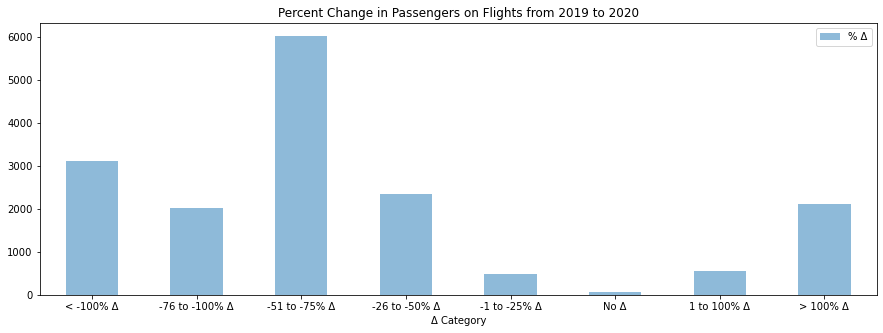

In [93]:
binlabels = ['< -100% Δ', '-76 to -100% Δ', '-51 to -75% Δ', '-26 to -50% Δ', '-1 to -25% Δ','No Δ','1 to 100% Δ', '> 100% Δ']
cut_bins = [-float("inf"),-1,-0.75,-0.5,-0.25,-0.01,0.01,1,float("inf")]
                                   
flightchanges['Δ Category'] = pd.cut(flightchanges['% Δ'], bins=cut_bins, labels=binlabels)

summarychangesgrp = flightchanges.groupby('Δ Category').agg({'% Δ':'count'}) 

summary_changes_bar = summarychangesgrp.plot.bar(figsize=(15,5), alpha=0.5, align="center", title="Percent Change in Passengers on Flights from 2019 to 2020")
summary_changes_bar.set_xticklabels(summarychangesgrp.index, rotation=0)

### Analysis
We can see that the majority of flights saw a substantial decrease in passengers. However, there were a large number of passengers on new flights.

In [ ]:
#get flight that had the most passengers in 2019 and saw a greater than 100% decrease and plot as line charts with pct_change over months for 2019 and 2020


## Review of all flights by Origin and Destination

In [2]:
passengers_by_flight = flightdata.groupby(['YEAR','flight'], as_index = False).agg({'PASSENGERS':'sum'})
passengers_by_flight.sort_values(by=['YEAR','PASSENGERS'], ascending=False)

flights2020 = pd.DataFrame(passengers_by_flight.loc[passengers_by_flight['YEAR']==2020,:])
top20flights_2020 = flights2020.sort_values(by=['YEAR','PASSENGERS'], ascending=False).head(20)

flights2019 = pd.DataFrame(passengers_by_flight.loc[passengers_by_flight['YEAR']==2019,:])
top20flights_2019 = flights2019.sort_values(by=['YEAR','PASSENGERS'], ascending=False).head(20)



### Chi Squared Test for Top 20 flights in 2020

In [3]:
df = len(top20flights_2020)-1
q=0.95

top20flights_2020['expected'] = round(top20flights_2020['PASSENGERS'].mean(),0)

print(df,round(top20flights_2020['PASSENGERS'].mean(),0))

#critical value
critical_value = st.chi2.ppf(q=q,df=df)
print(f'the critical value is {critical_value}')

st.chisquare(top20flights_2020['PASSENGERS'],top20flights_2020['expected'])


19 349777.0
the critical value is 30.14352720564616


Power_divergenceResult(statistic=50103.73374750198, pvalue=0.0)

### Chi Squared Test for Top 20 flights in 2019

In [4]:
df = len(top20flights_2019)-1
q=0.95

top20flights_2019['expected'] = round(top20flights_2019['PASSENGERS'].mean(),0)

print(df,round(top20flights_2019['PASSENGERS'].mean(),0))

#critical value
critical_value = st.chi2.ppf(q=q,df=df)
print(f'the critical value is {critical_value}')

st.chisquare(top20flights_2019['PASSENGERS'],top20flights_2019['expected'])


19 870701.0
the critical value is 30.14352720564616


Power_divergenceResult(statistic=262415.12716765003, pvalue=0.0)

## Review of all flights by Origin and Destination (US States)

In [5]:
#passengers by state
passengers_by_state = flightdata.groupby(['YEAR','ORIGIN_STATE_NM'], as_index = False).agg({'PASSENGERS':'sum'})
passengers_by_state.sort_values(by=['YEAR','PASSENGERS'], ascending=False).head(20)

stateflights2020 = pd.DataFrame(passengers_by_state.loc[passengers_by_state['YEAR']==2020,:])
top20states_2020 = stateflights2020.sort_values(by=['YEAR','PASSENGERS'], ascending=False).head(20)

stateflights2019 = pd.DataFrame(passengers_by_state.loc[passengers_by_state['YEAR']==2019,:])
top20states_2019 = stateflights2019.sort_values(by=['YEAR','PASSENGERS'], ascending=False).head(20)

### Chi Squared Test for Top 20 flights in 2020

In [6]:
df = len(top20states_2020)-1
q=0.95

top20states_2020['expected'] = round(top20states_2020['PASSENGERS'].mean(),0)

print(df,round(top20states_2020['PASSENGERS'].mean(),0))

#critical value
critical_value = st.chi2.ppf(q=q,df=df)
print(f'the critical value is {critical_value}')

st.chisquare(top20states_2020['PASSENGERS'],top20states_2020['expected'])


19 9853062.0
the critical value is 30.14352720564616


Power_divergenceResult(statistic=110591873.69335493, pvalue=0.0)

### Chi Squared Test for Top 20 flights in 2019

In [7]:
df = len(top20states_2019)-1
q=0.95

top20states_2019['expected'] = round(top20states_2019['PASSENGERS'].mean(),0)

print(df,round(top20states_2019['PASSENGERS'].mean(),0))

#critical value
critical_value = st.chi2.ppf(q=q,df=df)
print(f'the critical value is {critical_value}')

st.chisquare(top20states_2019['PASSENGERS'],top20states_2019['expected'])


19 23374192.0
the critical value is 30.14352720564616


Power_divergenceResult(statistic=253779885.33529663, pvalue=0.0)